In [32]:
import numpy as np
import pandas as pd
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict,cross_val_score

### Load Diabetes dataset ###

In [15]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

__Now we can use the train_test_split function in order to make the split. The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.__

In [16]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [29]:
# fit a model
lm = linear_model.LinearRegression()
model= lm.fit(X_train, y_train)
predictions = model.predict(X_test)
# predictions(0)

Text(0, 0.5, 'Predictions')

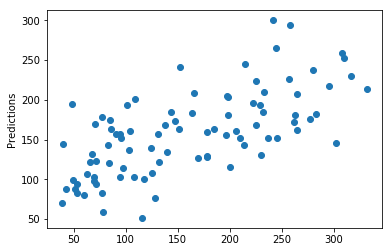

In [30]:
## The line / model
plt.scatter(y_test, predictions)
# plt.xlabel('True Values')
plt.ylabel('Predictions')

__We can perform something called cross validation. It’s very similar to train/test split, but it’s applied to more subsets. I’ll use the cross_val_predict function to return the predicted values for each data point when it’s in the testing slice.__

In [33]:
# from sklearn import metrics

#Perform 6-fold cross validation
cross_val_score(model,df, y, cv=6)

array([0.4554861 , 0.46138572, 0.40094084, 0.55220736, 0.43942775,
       0.56923406])

__As you can see, the last fold improved the score of the original model — from 0.485 to 0.569. Not an amazing result, but we’ll take what we can get.
Now, let’s plot the new predictions, after performing cross validation.__


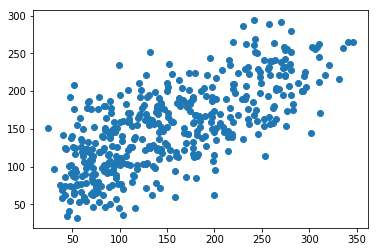

In [28]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)